In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv(r"C:\Users\Noah\Downloads\Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
df['Balance'] = pd.to_numeric(df['Balance'], errors='coerce')
df['CreditScore'] = pd.to_numeric(df['CreditScore'], errors='coerce')
df['EstimatedSalary'] = pd.to_numeric(df['EstimatedSalary'], errors='coerce')

In [15]:
df['Balance'] = df['Balance'].fillna(df['Balance'].mean())
df['CreditScore'] = df['CreditScore'].fillna(df['CreditScore'].mean())
df['EstimatedSalary'] = df['EstimatedSalary'].fillna(df['EstimatedSalary'].mean())

In [16]:
df.columns = df.columns.str.strip()

In [18]:
for col in['Geography', 'Gender']:
    df[col] = df[col].str.strip().str.title()

In [24]:
#df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'])


In [25]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [28]:
churned_df = df[df['Exited'] == 1]

In [29]:
churned_df.shape
churned_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1


In [30]:
retained_df = df[df['Exited'] == 0]
retained_df.shape
retained_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


In [31]:
active_df = df[df['IsActiveMember'] == 1]
active_df.shape
active_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


In [32]:
high_balance_df = df[df['Balance'] > 100000]
high_balance_df.shape
high_balance_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


In [33]:
senior_df = df[df['Age'] > 62]
senior_df.shape
senior_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
58,511,Spain,Female,66,4,0.00,1,1,0,1643.11,1
85,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
104,670,Spain,Female,65,1,0.00,1,1,1,177655.68,1
158,646,France,Female,73,6,97259.25,1,0,1,104719.66,0
181,510,France,Male,65,2,0.00,2,1,1,48071.61,0


In [38]:
high_value_churn_df = df[(df['Balance'] > 100000) & (df['Exited'] == 1)]
high_value_churn_df.shape
high_value_churn_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
35,475,France,Female,45,0,134264.04,1,1,0,27822.99,1


In [41]:
inactive_churn_df = df[(df['Exited'] == 1) & (df['IsActiveMember'] == 0)]
inactive_churn_df.shape
inactive_churn_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
22,510,Spain,Female,38,4,0.00,1,1,0,118913.53,1


In [43]:
france_df = df[df['Geography'] == 'France']
france_df.shape
france_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


In [44]:
germany_df = df[df['Geography'] == 'Germany']
germany_df.shape
germany_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
15,616,Germany,Male,45,3,143129.41,2,0,1,64327.26,0
16,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
26,756,Germany,Male,36,2,136815.64,1,1,1,170041.95,0
28,574,Germany,Female,43,3,141349.43,1,1,1,100187.43,0


In [45]:
spain_df = df[df['Geography'] == 'Spain']
spain_df.shape
spain_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
11,497,Spain,Male,24,3,0.00,2,1,0,76390.01,0
14,635,Spain,Female,35,7,0.00,2,1,1,65951.65,0


In [48]:
df['AgeGroup'] = np.where( df['Age'] <= 30, 'Young', np.where( df['Age'] <= 50, 'Adult', 'Senior'))
#df['AgeGroup].value_counts()
#df[['Age', 'AgeGroup]].head(10)
                           
                                                               

In [49]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Adult
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Adult
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Adult
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Adult
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Adult
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Adult
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Adult
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Adult


In [51]:
df['BalanceCategory'] = np.where( df['Balance'] == 0, 'No Balance', np.where( (df['Balance'] > 0) & (df['Balance'] <= 50000) , 'Low Balance',np.where( (df['Balance'] > 50000) & (df['Balance'] <= 100000) , 'Medium Balance', 'High Balance')))

In [53]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup,BalanceCategory
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Adult,No Balance
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Adult,Medium Balance
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Adult,High Balance
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Adult,No Balance
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Adult,High Balance
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Adult,No Balance
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Adult,Medium Balance
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Adult,No Balance
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Adult,Medium Balance


In [60]:
df['RiskLevel'] = np.where( (df['CreditScore'] < 600) | (df['IsActiveMember'] == 0) | (df['Balance'] < 100000), 'High Risk', np.where( (df['CreditScore'] >= 600) & (df['CreditScore'] <= 700), 'Medium Risk', 'Low Risk'))

In [59]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup,BalanceCategory,RiskLevel
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Adult,No Balance,High Risk
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Adult,Medium Balance,High Risk
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Adult,High Balance,High Risk
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Adult,No Balance,High Risk
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Adult,High Balance,Low Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Adult,No Balance,High Risk
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Adult,Medium Balance,High Risk
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Adult,No Balance,High Risk
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Adult,Medium Balance,High Risk


In [69]:
exited_percentage = (df['Exited'].sum() / len(df['Exited'])) * 100
print(f'Percentage of customers who exited: {exited_percentage:2f}%')

Percentage of customers who exited: 20.370000%


In [78]:
gender_exit_percentage = df.groupby('Gender')['Exited'].mean() * 100
print(f'Percentage of customers who exited by gender: {gender_exit_percentage:}%')

Percentage of customers who exited by gender: Gender
Female    25.071539
Male      16.455928
Name: Exited, dtype: float64%


In [79]:
geography_exit_percentage = df.groupby('Geography')['Exited'].mean() *100
print(f'Percentage of customers who exited by location: {geography_exit_percentage:}%')

Percentage of customers who exited by location: Geography
France     16.154767
Germany    32.443204
Spain      16.673395
Name: Exited, dtype: float64%


In [82]:
age_group_exit_percentage = df.groupby('AgeGroup')['Exited'].mean() * 100
print(f'Percentage of customers who exited by age group: {age_group_exit_percentage:}%')

Percentage of customers who exited by age group: AgeGroup
Adult     19.583518
Senior    44.647105
Young      7.520325
Name: Exited, dtype: float64%


In [83]:
activity_status_exit_percentage = df.groupby('IsActiveMember')['Exited'].mean() * 100
print(f'Percentage of customers who exited by activity status: {activity_status_exit_percentage:}%')

Percentage of customers who exited by activity status: IsActiveMember
0    26.850897
1    14.269074
Name: Exited, dtype: float64%


In [85]:
average_balance_exit_customers = df.groupby('Exited')['Balance'].mean()
print(f'Average balance of exited customers: {average_balance_exit_customers:}%')

Average balance of exited customers: Exited
0    72745.296779
1    91108.539337
Name: Balance, dtype: float64%


In [86]:
average_credit_score_by_exit_status = df.groupby('Exited')['CreditScore'].mean()
print(f'Average credit score by exit status: {average_credit_score_by_exit_status:}%')

Average credit score by exit status: Exited
0    651.853196
1    645.351497
Name: CreditScore, dtype: float64%


In [88]:
highest_churn_percent_by_location = df.groupby('Geography')['Exited'].mean() * 100
print(f'Highest exit rate by location: {highest_churn_percent_by_location}%')

Highest exit rate by location: Geography
France     16.154767
Germany    32.443204
Spain      16.673395
Name: Exited, dtype: float64%


<Axes: title={'center': 'Churn count'}, xlabel='Exited', ylabel='Number of Customers'>

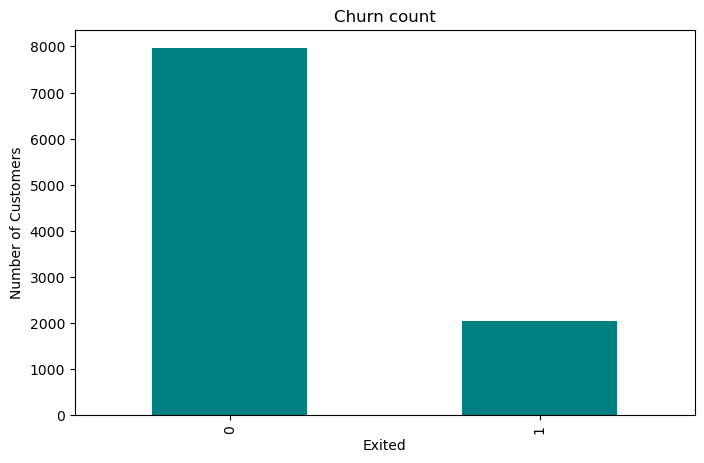

In [93]:
plt.figure(figsize=(8,5))
df.groupby('Exited')['Exited'].count().plot(kind='bar', color='teal', ylabel='Number of Customers', title='Churn count')

<Axes: title={'center': 'Exit by Country'}, xlabel='Country', ylabel='Number of Customers'>

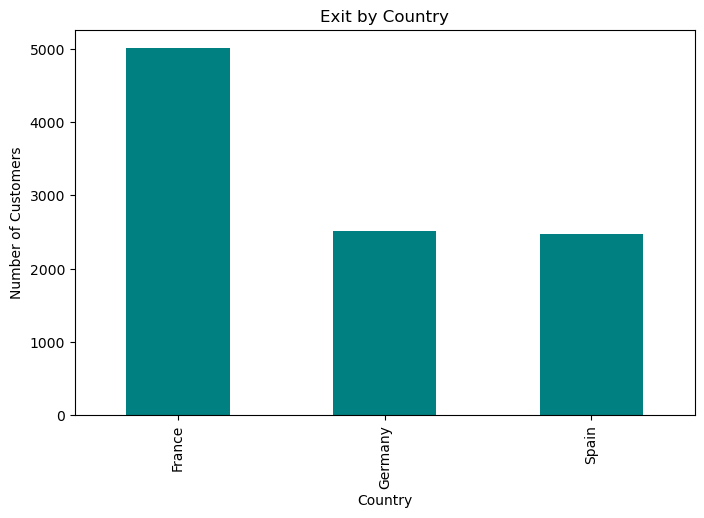

In [96]:
plt.figure(figsize=(8,5))
df.groupby('Geography')['Exited'].count().plot(kind='bar', color='teal', xlabel='Country', ylabel='Number of Customers', title='Exit by Country')

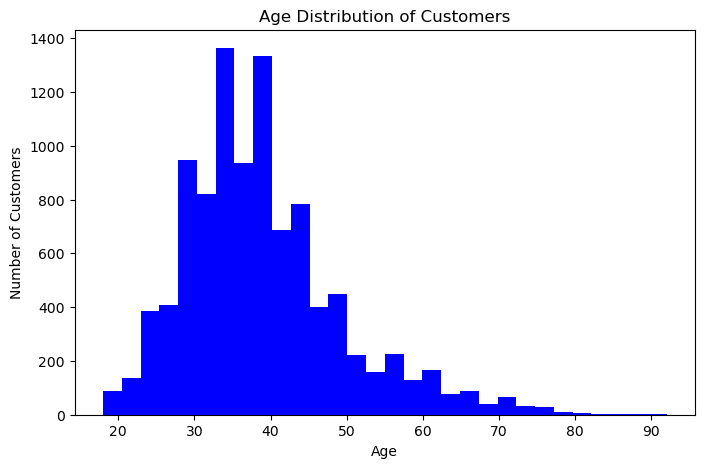

In [103]:
plt.figure(figsize=(8,5))
df['Age'].hist(color='blue', bins=30)
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Age Distribution of Customers')
plt.grid(False)

plt.show()

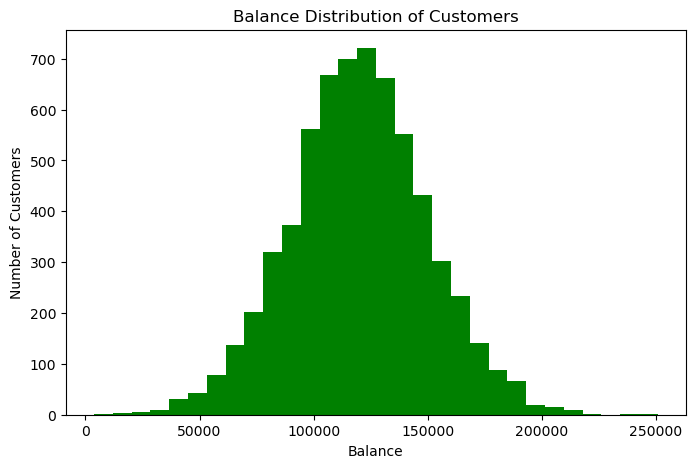

In [111]:
plt.figure(figsize=(8,5))
non_zero_balance = df[df['Balance'] > 0]['Balance']
non_zero_balance.hist(color='green', bins=30)
plt.xlabel('Balance')
plt.ylabel('Number of Customers')
plt.title('Balance Distribution of Customers')
plt.grid(False)

plt.show()

<Figure size 800x500 with 0 Axes>

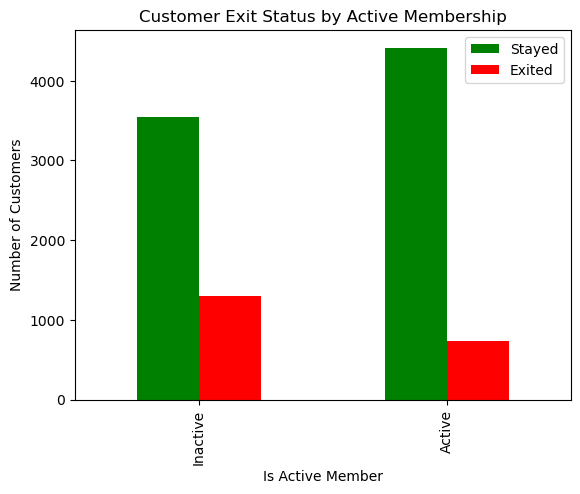

In [121]:
plt.figure(figsize=(8,5))
exit_by_activity = pd.crosstab(df['IsActiveMember'],df['Exited'])
exit_by_activity.plot(
    kind='bar',
    color=['green', 'red'],
    xlabel='Is Active Member',
    ylabel='Number of Customers',
    title='Customer Exit Status by Active Membership'
)

plt.xticks([0,1], ['Inactive', 'Active'])
plt.legend(['Stayed', 'Exited'])

<Figure size 800x500 with 0 Axes>

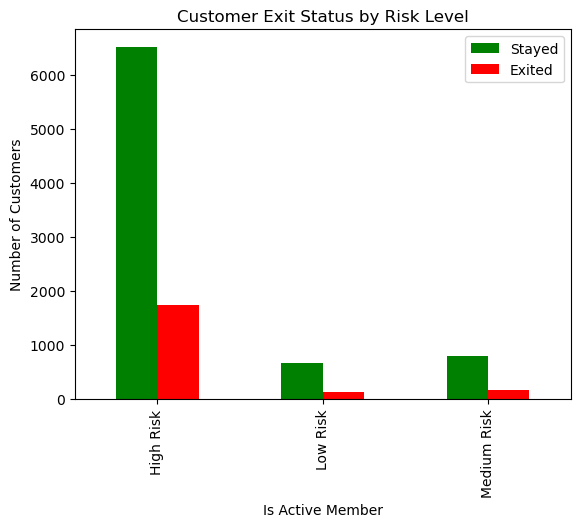

In [125]:
plt.figure(figsize=(8,5))
exit_by_risk = pd.crosstab(df['RiskLevel'],df['Exited'])
exit_by_risk.plot(
    kind='bar',
    color=['green', 'red'],
    xlabel='Is Active Member',
    ylabel='Number of Customers',
    title='Customer Exit Status by Risk Level'
)


plt.legend(['Stayed', 'Exited'])

In [130]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup,BalanceCategory,RiskLevel
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Adult,No Balance,High Risk
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Adult,Medium Balance,High Risk
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Adult,High Balance,High Risk
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Adult,No Balance,High Risk
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Adult,High Balance,Low Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Adult,No Balance,High Risk
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Adult,Medium Balance,High Risk
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Adult,No Balance,High Risk
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Adult,Medium Balance,High Risk
